# Singular-Value Decomposition (SVD)

In [1]:
import numpy as np
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import copy

In [2]:
def plot_matrices(matrices, size, tol, shape,
                  colormap='turbo', bad_color='black', same_scale=True):

    num_matrices = len(matrices)
    assert num_matrices <= shape[0]*shape[1], 'matrices does not match shape'

    cmap = copy(mpl.colormaps[colormap])
    cmap.set_bad(color=bad_color)

    if same_scale is True:
        vmax = []
        vmin = []
        for matrix in matrices:
            vmax.append(np.max(matrix))
            vmin.append(np.min(matrix))
        vmax = np.max(vmax)
        vmin = np.min(vmin)

    plt.figure(figsize=size)

    for i, matrix in enumerate(matrices):

        assert matrix.ndim == 2, 'matrices must contain 2D arrays'
        plt.subplot(shape[0], shape[1], i+1)
        matrix_masked = np.ma.masked_where(np.abs(matrix) < tol, matrix)
        if same_scale is True:
            plt.matshow(matrix_masked, fignum=0, cmap=cmap,
                        vmin=vmin, vmax=vmax)
        else:
            plt.matshow(matrix_masked, fignum=0, cmap=cmap)
        if matrix.shape[0] == 1:
            plt.yticks([0])
        if matrix.shape[1] == 1:
            plt.xticks([0])
        plt.colorbar()

    plt.tight_layout()
    plt.show()

### N > M (more rows than columns)

In [3]:
rng = np.random.default_rng()

N, M = 9, 6

A1 = rng.standard_normal((N, M))

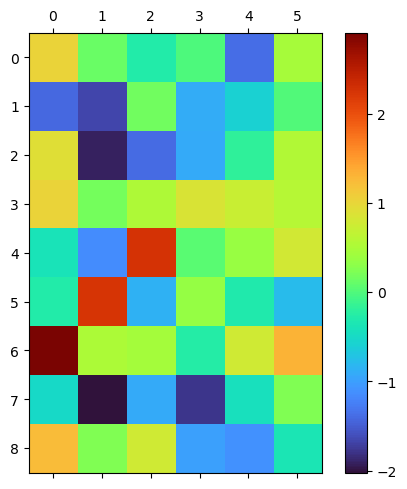

In [4]:
plot_matrices(matrices=[A1], size=(5,5), tol=1e-15, shape=(1,1))

In [5]:
U1, S1, V1T = linalg.svd(A1)

In [6]:
S1_matrix = np.vstack([np.diag(S1), np.zeros((N-M, M))])

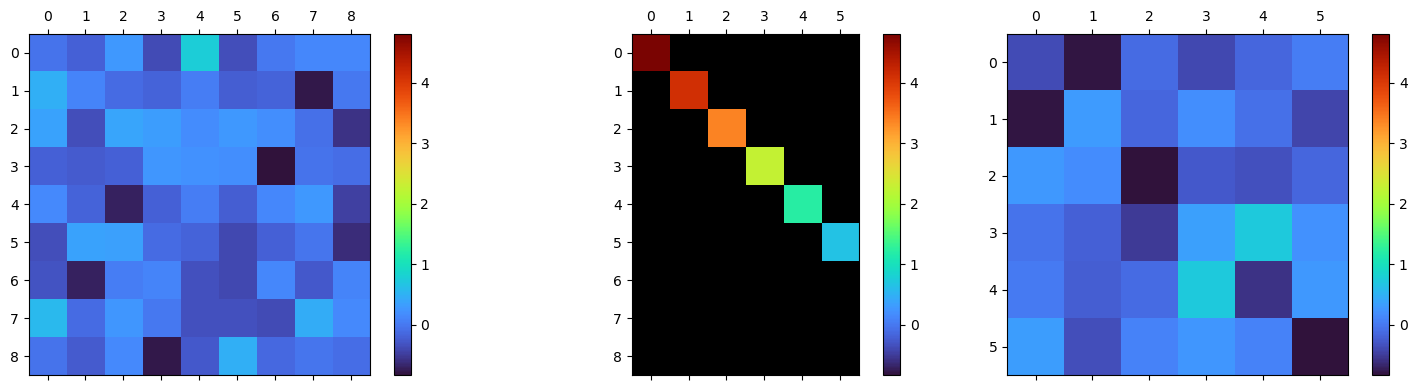

In [7]:
plot_matrices(
    matrices=[U1, S1_matrix, V1T], 
    size=(15,4), tol=1e-15, shape=(1,3)
)

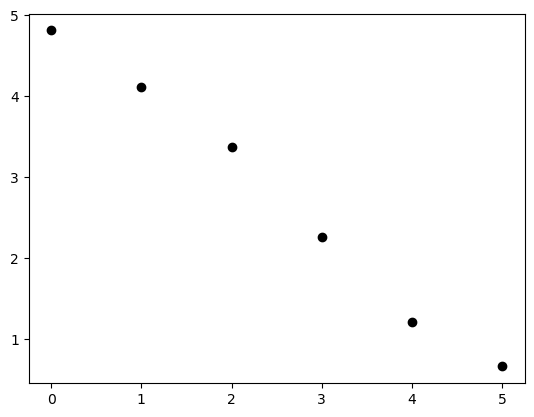

In [8]:
plt.figure()
plt.plot(S1, 'ko')
plt.show()

In [9]:
np.allclose(A1, U1@S1_matrix@V1T)

True

### N < M (more columns than rows)

In [10]:
N, M = 6, 9

A2 = rng.standard_normal((N, M))

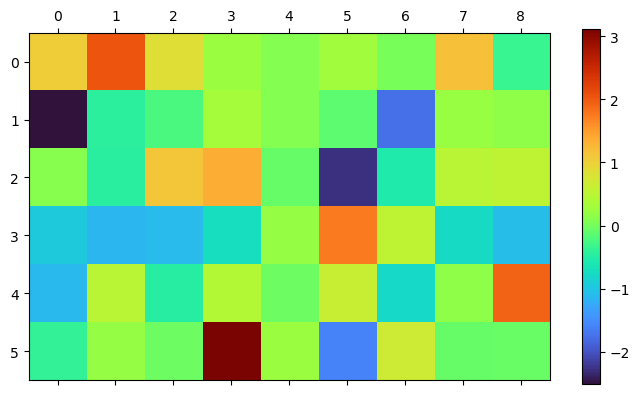

In [11]:
plot_matrices(matrices=[A2], size=(7,4), tol=1e-15, shape=(1,1))

In [12]:
U2, S2, V2T = linalg.svd(A2)

In [13]:
S2_matrix = np.hstack([np.diag(S2), np.zeros((N, M-N))])

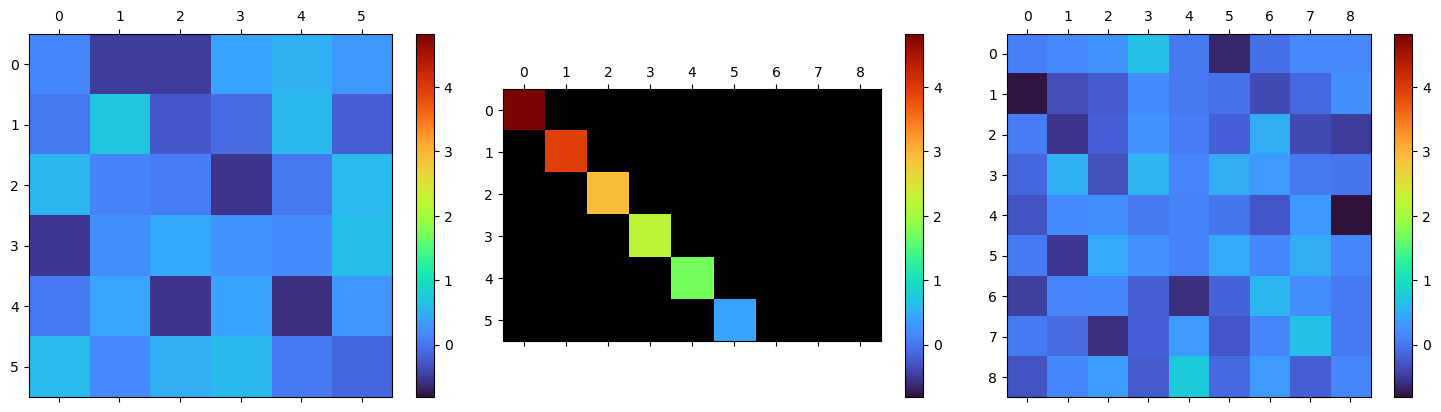

In [14]:
plot_matrices(
    matrices=[U2, S2_matrix, V2T], 
    size=(15,4), tol=1e-15, shape=(1,3)
)

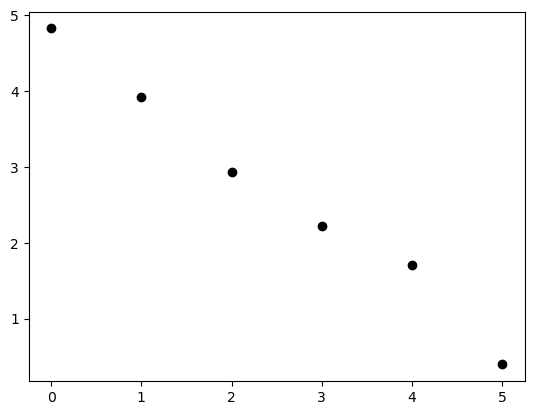

In [15]:
plt.figure()
plt.plot(S2, 'ko')
plt.show()

In [16]:
np.allclose(A2, U2@S2_matrix@V2T)

True